In [17]:
import numpy as np
import pandas as pd
#import pandas_profiling
import statistics
import seaborn as sns
import math

# this python magics will allow plot to be embedded into the notebook

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

import time
from sklearn.preprocessing import Imputer

pd.set_option('display.max_columns', 150)

In [3]:
df = pd.read_csv('application_train.csv')

# Business Understanding

In the money lending industry one key question persists - will money borrowers be able to pay back what they borrowed?

Home Credit, a financial services company wants the Kaggle community to help them accurately answer this business problem using machine learning. Their primary goal is to extend safe and smooth lending services to people who have sparse credit histories or who have been unable to open traditional banking accounts. 

For new borrowers, data such as  FICO credit score of the borrower, number of days the borrower has had a credit line and borrower’s number of inquiries by creditors in the last 6 months cannot be used to determine loan eligibilty. Non-traditional data on the borrowers will be ideal in this case. Home Credit has provided such a data set wih non-traditonal data points in the data set __application_train/application_test.csv__. This data set also denotes whether the borrower had difficulty making the initial payments on their loans.

With this data set our team will attempt to use supervised learning to predict whether a borrower is likely to pay back money borrowed. The ability to accurately predict the risk of the borrower will be valuable to Home Credit to make better decisions about whether to lend any money at all - or perhaps at a lower amount or different repayment structure. 

# Data Meaning Type
In this section we will provide a brief description of each attribute and it corresponding datatype.

In [ ]:
df.head()

In [44]:
df.shape

(307511, 60)

In [ ]:
pd.set_option('display.max_row', 1000)
df.dtypes

There are three unique data types present in this dataset:
1. Object - Represents categorical data. Ex "Cash loan"
2. Int64 - Represents whole number counts for non continuous values. Ex "Number of Children" or Binary (0 and 1)
3. Float64 - Represents contiuous values. Ex. "Amount of Annuity"

In [ ]:
# Summary of object type columns
object_df = df.select_dtypes(include=['object'])

data = []
for col in object_df:
    unique_array = object_df[col].unique()
    data.append({'column_name': col, 'value_count': len(unique_array), 'values': unique_array})

object_df = pd.DataFrame(data)
object_df.style.set_properties(subset=['values'], **{'width': '700px'})

Above is a breakdown of the Object type columns. Each print output dispalys the column name, the unique values, and the number of unique values.

In [ ]:
#Summary of int64 type columns
object_df = df.select_dtypes(include=['int64'])

object_df.describe().round(1)

Above is a breakdown of summary statistics for Int64 type columns.

In [ ]:
#Summary of float64 type columns
object_df = df.select_dtypes(include=['float64'])

object_df.describe().round(0)

Above is a breakdown of summary statistics for Float64 type columns.

# Data Quality

This section will highlight any issues that were discovered with the data and the approach that was taken to address those issues. Since there are 122 columns in the dataset we wanted carefully assess whether each column is needed. There were three main issues in the dataset that required cleanup: highly correlated columns, columns with missing values (9.6% of the dataset had missing values), and columns with NA values. Each of these will be addressed in more detail.

In [ ]:
# Write Data Profiling File

profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="profile_report.html")
profile

#### Highly Correlated Columns

Often times input features are correlated, meaning that they depend on each another and carry similar meaning. Thus removing one of those features does not impact the ability to perform analysis. In fact, it ususally helps reduce over inflation of standard errors which increases the likelyhood of including variables in a model where they would be excluded.

In [4]:
# drop all columns that pandas profiling indicates that should be removed because of correlation.
columns_to_drop=['AMT_GOODS_PRICE','APARTMENTS_MEDI','APARTMENTS_MODE','BASEMENTAREA_MEDI','BASEMENTAREA_MODE','COMMONAREA_MEDI','COMMONAREA_MODE','ELEVATORS_MEDI','ELEVATORS_MODE','ENTRANCES_MEDI','ENTRANCES_MODE','FLAG_DOCUMENT_10','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_19','FLAG_DOCUMENT_2','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLOORSMAX_MEDI','FLOORSMAX_MODE','FLOORSMIN_MEDI','FLOORSMIN_MODE','LANDAREA_MEDI','LANDAREA_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_MODE','LIVINGAREA_AVG','LIVINGAREA_MEDI','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MEDI','NONLIVINGAREA_MODE','OBS_60_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT_W_CITY','TOTALAREA_MODE','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MEDI','YEARS_BUILD_MODE']
drop_columns_df = pd.DataFrame({'column_name_that_will_be_dropped': columns_to_drop})
print (drop_columns_df)
df = df.drop(columns_to_drop, axis=1)

   column_name_that_will_be_dropped
0                   AMT_GOODS_PRICE
1                   APARTMENTS_MEDI
2                   APARTMENTS_MODE
3                 BASEMENTAREA_MEDI
4                 BASEMENTAREA_MODE
5                   COMMONAREA_MEDI
6                   COMMONAREA_MODE
7                    ELEVATORS_MEDI
8                    ELEVATORS_MODE
9                    ENTRANCES_MEDI
10                   ENTRANCES_MODE
11                 FLAG_DOCUMENT_10
12                 FLAG_DOCUMENT_12
13                 FLAG_DOCUMENT_13
14                 FLAG_DOCUMENT_14
15                 FLAG_DOCUMENT_15
16                 FLAG_DOCUMENT_16
17                 FLAG_DOCUMENT_17
18                 FLAG_DOCUMENT_19
19                  FLAG_DOCUMENT_2
20                 FLAG_DOCUMENT_20
21                 FLAG_DOCUMENT_21
22                   FLOORSMAX_MEDI
23                   FLOORSMAX_MODE
24                   FLOORSMIN_MEDI
25                   FLOORSMIN_MODE
26                    LANDAR

After reviewing the pearson correlation values and recommendations from the profiling report, we decided to remove those variables with a high degree of correlation. Fourty-five columns with >.9 correlation values were removed from the dataset. This reduction helps reduce some of the complexity without greatly impacting the modeling ability.

### Handling Columns with Lots of Missing Values

In [5]:
# Function that finds missing values:
def num_missing(x):
  return sum(x.isnull())

In [6]:
# Applying for missing columns:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL 

In [7]:
# Drop columns with large numbers of missing values. These potentially could be interpreted together and combinded into
# columns that may have meaning. However that may introduce a lot more complexity and for now we have made the decisison
# to drop them. All columns here have more than 100,000 missing values.
lots_of_missing_values = ['OWN_CAR_AGE', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 
                        'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'FONDKAPREMONT_MODE',
                        'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'EXT_SOURCE_1',
                        'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
                        'COMMONAREA_AVG']
lots_of_missing_values_df = pd.DataFrame({'column_name_that_will_be_dropped': lots_of_missing_values})
print (lots_of_missing_values_df)
df = df.drop(lots_of_missing_values, axis=1)

   column_name_that_will_be_dropped
0                       OWN_CAR_AGE
1                     ELEVATORS_AVG
2                     ENTRANCES_AVG
3                     FLOORSMAX_AVG
4                     FLOORSMIN_AVG
5                      LANDAREA_AVG
6           NONLIVINGAPARTMENTS_AVG
7                 NONLIVINGAREA_AVG
8                FONDKAPREMONT_MODE
9                    HOUSETYPE_MODE
10               WALLSMATERIAL_MODE
11              EMERGENCYSTATE_MODE
12                     EXT_SOURCE_1
13                   APARTMENTS_AVG
14                 BASEMENTAREA_AVG
15      YEARS_BEGINEXPLUATATION_AVG
16                  YEARS_BUILD_AVG
17                   COMMONAREA_AVG


Removed columns with >100,000 missing values. The reason this was done instead of setting a value for missing is that it would greatly skew the meaning of these factors. For example, OWN_CAR_AGE of missing could imply that it was never collected or it could imply that the person did not have a car. These sorts of decisions are difficult to make and since there are lots of columns in this dataset we decided to remove them for now. In the future, we may impute these values or create new columns that may better represent the data.

#### Imputing Missing Values

In [8]:
# Applying for missing columns:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_

In [9]:
# fill missing values in columns that are objects with unknown. 
df['NAME_TYPE_SUITE'].fillna('Unknown', inplace=True)
df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

NAME_TYPE_SUITE and OCCUPATION_TYPE are the only two categorical variables that still have missing values. For these we decided to create a new class called "Unknown". This was done because we could, if necessary, explain that as it own entity for further investigation.

In [10]:
# Applying for missing columns:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_

In [11]:
# Fill NaN values with the median of the column.

columns_to_impute = ['AMT_ANNUITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'OBS_30_CNT_SOCIAL_CIRCLE',
                    'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
columns_to_impute_df = pd.DataFrame({'column_name_that_will_be_imputed': columns_to_impute})
print (columns_to_impute_df)
for column in columns_to_impute:
    df[column].fillna((df[column].median()), inplace=True)

   column_name_that_will_be_imputed
0                       AMT_ANNUITY
1                      EXT_SOURCE_2
2                      EXT_SOURCE_3
3                   CNT_FAM_MEMBERS
4            DAYS_LAST_PHONE_CHANGE
5          OBS_30_CNT_SOCIAL_CIRCLE
6          DEF_30_CNT_SOCIAL_CIRCLE
7          DEF_60_CNT_SOCIAL_CIRCLE
8        AMT_REQ_CREDIT_BUREAU_HOUR
9         AMT_REQ_CREDIT_BUREAU_DAY
10       AMT_REQ_CREDIT_BUREAU_WEEK
11        AMT_REQ_CREDIT_BUREAU_MON
12        AMT_REQ_CREDIT_BUREAU_QRT
13       AMT_REQ_CREDIT_BUREAU_YEAR


Here we are taking a look at the rest of the variables which are all ints or floats. Here we decided to impute the median for each respective missing value. The reason we chose to do that is that we did not want to use the average because outliers would have a more profound impact. Thus we chose the median as a simple imputation technique for now. However, this is open for change based off further analysis and more sophisticated imputation techniques such as Expectation-Maximization can be attempted.

In [12]:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
WEEKDAY_APPR_PRO

In [ ]:
# df.to_csv('imputed_cleaned_train_data.csv', sep=',')

In [ ]:
df.info()

After cleaning we have no more columns with NA values and have reduced our dataset down to 59 dimensions.

# Simple Statistics

First, we will take a look at our target variable. That is, whether a client had difficulty paying and/or made late payment on one of the first installments of their loan. This information is useful for understanding our class distribution, which will be critical for effective modeling and understanding our predictive capability in later projects.

In [13]:
df_target_count = df['TARGET'].value_counts() # calculate counts of 1, 0 in TARGET
df_target_count # print counts

0    282686
1     24825
Name: TARGET, dtype: int64

This shows that 24,825 clients had difficulty with the first installments of their loans, while 282,686 did not.

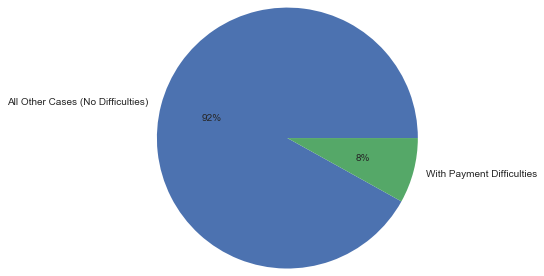

In [18]:
pie_labels = ['All Other Cases (No Difficulties)','With Payment Difficulties']
plt.axis("equal")
plt.pie(df_target_count, labels=pie_labels, radius=1.5, autopct='%0.0f%%')
plt.show()

This shows that our class distribution is not balanced as only 8% of our data had an issue with the first installment - while 92% had no payment difficulties.

We can also look at the counts of gender in the data. We found a small number of values of 'XNA' in this feature, which we will remove.

In [19]:
df2 = df[df['CODE_GENDER'] != 'XNA']  # this removes 4 instances of a value called "XNA" in CODE_GENDER
df_gender_count = df2['CODE_GENDER'].value_counts()   # calculate counts of values in CODE_GENDER
df_gender_count # print counts

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

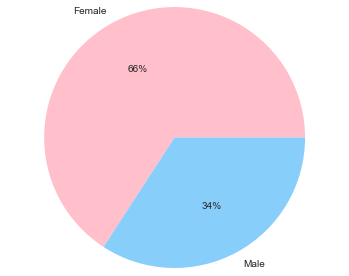

In [20]:
pie_labels = ['Female','Male']
colors = ['pink','lightskyblue']
plt.axis("equal")
plt.pie(df_gender_count, labels=pie_labels, radius=1.5, autopct='%0.0f%%', colors=colors)
plt.show()

These raw counts and pie chart are interesting! It shows that 66% of the clients in the data are female, while only 34% are male. Later we will analyze a grouping of how each of the classes are distributed for male and female. This will help us to explore if there are any notable differences between gender and diffculty with the initial loan repayment.

Let's take a look at the distribution of number of children for all clients. This is found in the CNT_CHILDREN feature. We will discretize this feature as there are some outliers.

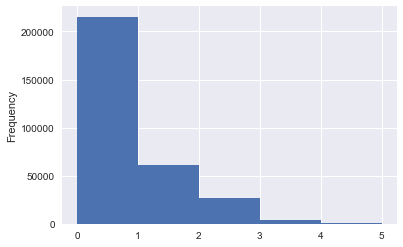

In [21]:
children = [0,1,2,3,4,5]
df['CNT_CHILDREN'].plot.hist(bins=children)

This shows that a large number of clients actually do not have children. Let's now take a look at what percentage of clients have no children compared to those with at least 1.

In [23]:
df['HAS_KIDS'] = np.where(df['CNT_CHILDREN']==0, 'Yes', 'No')   # This is creating a new feature.
df_children = df['HAS_KIDS'].value_counts()
df_children

Yes    215371
No      92140
Name: HAS_KIDS, dtype: int64

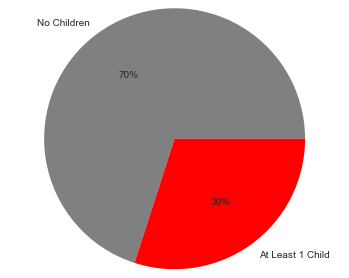

In [24]:
pie_labels = ['No Children','At Least 1 Child']
colors = ['grey','red']
plt.axis("equal")
plt.pie(df_children, labels=pie_labels, radius=1.5, autopct='%0.0f%%', colors=colors)
plt.show()

This demonstrates that 70% of clients do not have children. This is meaningful as further analysis may reveal that this has an impact on the clients ability to repay the loan.

Another interesting statistic would be to look at the distribution of income across all clients (those with and without payment difficulties). This will be achieved with a histogram on AMT_INCOME_TOTAL. We found that this feature is highly skewed and it's very difficult to bucket due to it's variance.

In [25]:
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].astype(np.int64)
df['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f')) # removes scientific notation

count       307511.000000
mean        168797.917938
std         237123.146280
min          25650.000000
25%         112500.000000
50%         147150.000000
75%         202500.000000
max      117000000.000000
Name: AMT_INCOME_TOTAL, dtype: object

For example, this shows that the 75-percent quartile range is 202,500 - while the maximum income is a whopping 117,000,000! 

In [26]:
df = df.sort_values(by=['AMT_INCOME_TOTAL'], ascending=False)
df['AMT_INCOME_TOTAL'].head(10)

12840     117000000
203693     18000090
246858     13500000
77768       9000000
131127      6750000
103006      4500000
204564      4500000
187833      4500000
287463      4500000
181698      3950059
Name: AMT_INCOME_TOTAL, dtype: int64

Reviewing the 10 largest values in the data reveal other notable outliers - there are 3 clients with greater than 10 million dollars. 

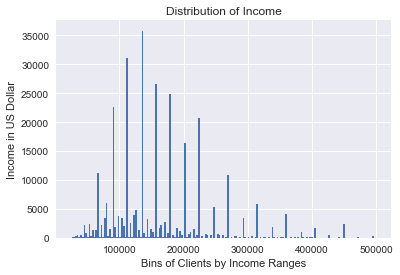

In [27]:
df1 = df[df['AMT_INCOME_TOTAL'] < 500000]   # this chops the data to only those clients with less than 500,000 in income
data1 = df1['AMT_INCOME_TOTAL'].astype(np.int64)

plt.hist(data1, log=False, bins='auto', histtype='bar')
plt.xlabel("Bins of Clients by Income Ranges")
plt.ylabel('Income in US Dollar')
plt.title('Distribution of Income')
plt.show()

The above histogram was generated with only those clients with $500,000 or less income and it still exhibits a highly skewed long tail. This will need to be addressed in later analysis. It's also clear from these buckets that some of the entries into this feature may be more standardized than others - thus the large spikes at certain buckets.

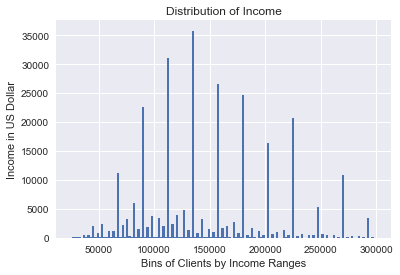

In [28]:
df1 = df[df['AMT_INCOME_TOTAL'] < 300000]   # this chops the data to only those clients with less than 500,000 in income
data1 = df1['AMT_INCOME_TOTAL'].astype(np.int64)

plt.hist(data1, log=False, bins='auto', histtype='bar')
plt.xlabel("Bins of Clients by Income Ranges")
plt.ylabel('Income in US Dollar')
plt.title('Distribution of Income')
plt.show()

Here is another view of the distribution limiting to those clients with less than $300,000 income.

The data includes whether or not a client included a certain document when they applied. Unfortunately, the data dictionary provided doesn't reveal what these documents are, but it might become useful later while modeling to find that some of these may have an impact on a client's ability to make an initial loan repayment.

In [52]:
df_flag_docs = df[['FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8',
                   'FLAG_DOCUMENT_9','FLAG_DOCUMENT_11','FLAG_DOCUMENT_18']]

df_flag_docs_counts = df_flag_docs.apply(pd.Series.value_counts)
df_flag_docs_counts

,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18
0,307486,302863,280433,307452,282487,306313,306308,305011
1,25,4648,27078,59,25024,1198,1203,2500


Overall - most of these are pretty sparsely populated, but may prove to be meaningful once we begin analysis on the significance of all features. 

# Visualize Attributes

Let's take a look at the amount of credit that was given. This is in the feature AMT_CREDIT.

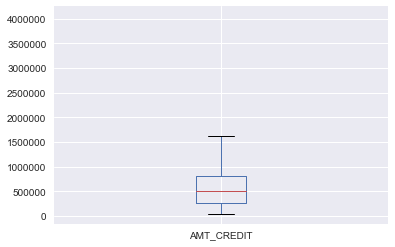

In [67]:
df['AMT_CREDIT'].to_frame().boxplot()

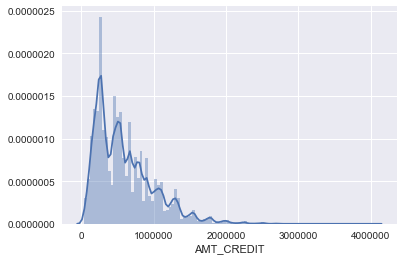

In [31]:
sns.distplot(df['AMT_CREDIT'], bins=100)

The box plot shows us that median loan credit is right at 500,000. The kernel density plot also shows us a spike some where less than $500,000.

Further to the last analysis on loan credit amount let's take a look at some buckets less than $1,000,000 at $50,000 increments.

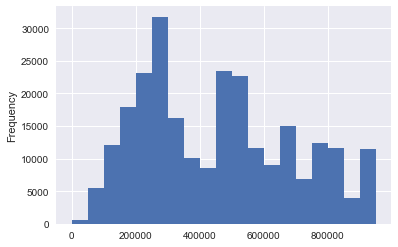

In [38]:
loanbuckets = range(0,1000000,50000)
df['AMT_CREDIT'].plot.hist(bins=loanbuckets)

This shows a large grouping of loans at the 300,000 and 500,000 buckets.

Let's take a look at the distribution of client age.

In [40]:
df['DAYS_BIRTH'].head(5)

12840    -12615
203693   -15704
246858   -13551
77768    -16425
131127   -19341
Name: DAYS_BIRTH, dtype: int64

It appears that this feature is stored as days in the past from when the client submitted an application. We can convert this to years by getting the absolute value and dividing the result by 365.

In [41]:
# since all values are days in the past...get absolute value and divide by 365 to convert to years.
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: abs(x) / 365)
df['DAYS_BIRTH'].head(5)

12840     34.561644
203693    43.024658
246858    37.126027
77768     45.000000
131127    52.989041
Name: DAYS_BIRTH, dtype: float64

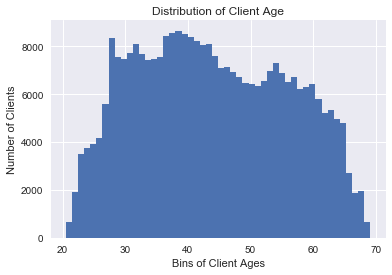

In [42]:
plt.hist(df['DAYS_BIRTH'], log=False, bins=50, histtype='bar')
plt.xlabel("Bins of Client Ages")
plt.ylabel('Number of Clients')
plt.title('Distribution of Client Age')
plt.show()

The histogram reveals that a majority of clients fall between the ages of about 27 to 43. It's also interesting that the histogram is fairly flat through the middle, which means that there is still a large portion of clients in the 44 to 63 range before it drops off dramatically.

This is an appropriate visualization as it breaks down a range of values (from about 20 to 70) and can visualize frequencies in buckets.

Let's now look at a breakdown of OCCUPATION_TYPE

In [53]:
df_occupation_count = df['OCCUPATION_TYPE'].value_counts()
df_occupation_count

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

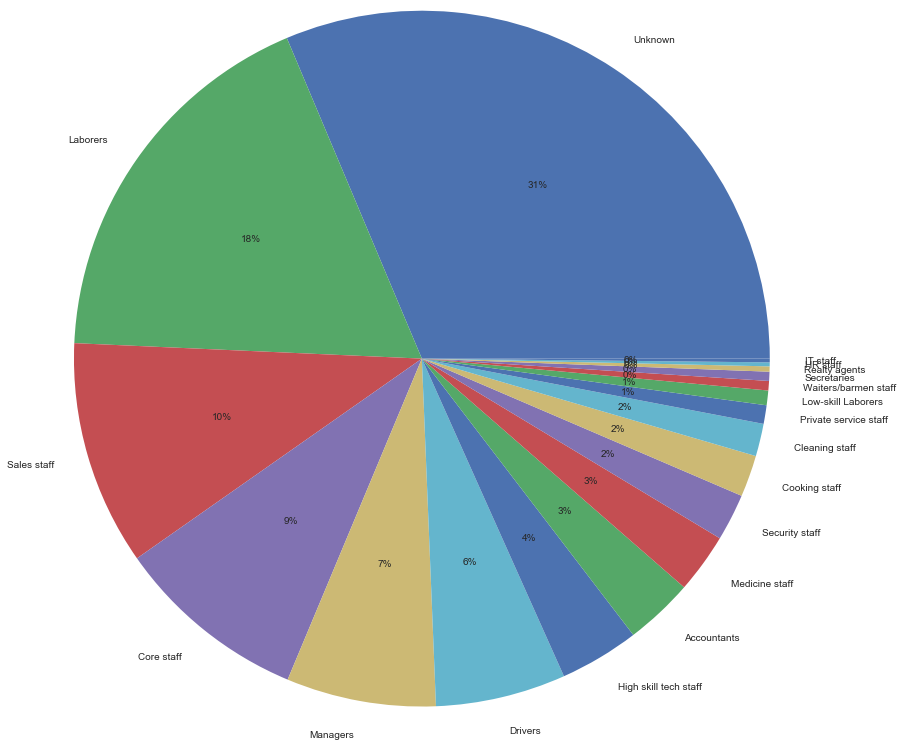

In [60]:
occupation_labels = ['Unknown','Laborers','Sales staff','Core staff','Managers','Drivers','High skill tech staff','Accountants','Medicine staff','Security staff','Cooking staff','Cleaning staff','Private service staff','Low-skill Laborers','Waiters/barmen staff','Secretaries','Realty agents','HR staff','IT staff']             
plt.axis('equal')
plt.pie(df_occupation_count, radius=4, autopct='%0.0f%%', labels=occupation_labels)
plt.show()

This pie chart is useful in that it shows among the most popular occupations for borrowers are: Laborers, Sales staff, Core staff, Managers, Drivers, High skill tech staff, and Accountants.

This is an appropriate visualization as barring a few of the values in this feature most of the values form large percentages of the whole set of values.

Let's now take a look at the breakdown of NAME_EDUCATION_TYPE, which shows the highest education the client received.

In [63]:
df_education_count = df['NAME_EDUCATION_TYPE'].value_counts()
df_education_count

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

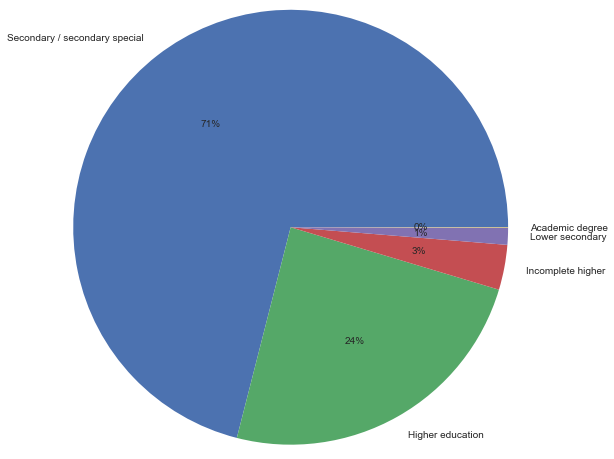

In [64]:
education_labels = ['Secondary / secondary special','Higher education','Incomplete higher','Lower secondary','Academic degree']             
plt.axis('equal')
plt.pie(df_education_count, radius=2.5, autopct='%0.0f%%', labels=education_labels)
plt.show()

This pie chart illustrates that roughly 3/4 of the clients only have a secondary education, while roughly 1/4 of the remainder have a higher education degree.

This is an appropriate visualization as the feature doesn't have many values and as mentioned 2 of them make up most of the data set.

Finally, we can look at the family status of the client by breaking down NAME_FAMILY_STATUS.

In [68]:
df4 = df[df['NAME_FAMILY_STATUS'] != 'Unknown']   # let's remove Unknowns here as there are only 2 records
df_family_count = df4['NAME_FAMILY_STATUS'].value_counts()
df_family_count

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

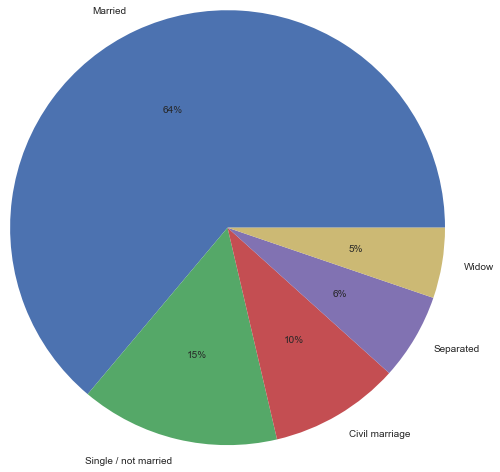

In [69]:
family_labels = ['Married','Single / not married','Civil marriage','Separated','Widow']             
plt.axis('equal')
plt.pie(df_family_count, radius=2.5, autopct='%0.0f%%', labels=family_labels)
plt.show()

The family status might have important implications on a client's ability to pay back a loan. For example, a dual-income family migh have more leverage and stability than someone who is single. 

This is very appropriate visualization for this feature as it's populated for every client and only has a small range of values.

# Explore Joint Attributes

"DINK"

# Explore Attributes and Class

An interesting attribute to examine would be the percentage breakdown of each class by gender. That is, what is the percentage of males versus females in the group with payment difficulties and those without.

TARGET  CODE_GENDER
0       F              188278
        M               94404
1       F               14170
        M               10655
Name: TARGET, dtype: int64
TARGET        False  True 
CODE_GENDER               
F            188278  14170
M             94404  10655
TARGET           False      True 
CODE_GENDER                      
F            93.000672   6.999328
M            89.858080  10.141920


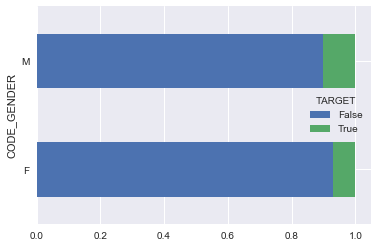

In [61]:
df3 = df[df['CODE_GENDER'] != 'XNA']    # this removes 4 instances of a value called "XNA" in CODE_GENDER
df_grouped_gender = df3.groupby(by=['TARGET','CODE_GENDER'])

print(df_grouped_gender.TARGET.count())

df_cross_gender = pd.crosstab([df3['CODE_GENDER']], df3.TARGET.astype(bool))

print(df_cross_gender)

gender_percentage = df_cross_gender.div(df_cross_gender.sum(1).astype(float), axis=0)
print(gender_percentage * 100)
gender_percentage.plot(kind='barh', stacked=True)

This is another very interesting stacked bar chart. Our earlier analysis revealed that the data was made up of 66% females when examining the whole data set. However, the above normalized bar chart tells us that 10.14% of males struggled with payment difficulties, while only 7% of females experienced these difficulties.

# New Features

We actually already created a new feature earlier in our analysis when we were looking at those borrowers who had at least 1 child.

See section in Simple Statistics.

Another interesting derived feature might be to consider the loan amount as a percentage of the borrowers income.

In [47]:
df['LOAN_PERCENT_OF_INCOME'] = (df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']) * 100

In [49]:
df['LOAN_PERCENT_OF_INCOME'].head()

12840      0.480762
203693     3.749981
246858    10.374100
77768     15.905900
131127    11.716000
Name: LOAN_PERCENT_OF_INCOME, dtype: float64

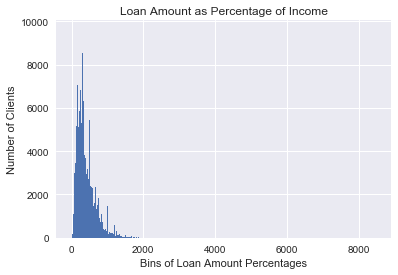

In [51]:
plt.hist(df['LOAN_PERCENT_OF_INCOME'], log=False, bins='auto', histtype='bar')
plt.xlabel("Bins of Loan Amount Percentages")
plt.ylabel('Number of Clients')
plt.title('Loan Amount as Percentage of Income')
plt.show()

This feature might be useful to measure a client's confidence in paying back the loan based on their current annual income (holding many other things equal).

# Exceptional Work

# Data Exploration with PCA

We explore the relationships between features using PCA below. Specifically, we want to know if there are certain correlations among features that allows us to reduce our dimensions by combining those features into 'composite' features along new axes (which represent the directions of maximum variance). A reduction of dimensions is not only useful for computational purposes, but it can also help prevent models we may want to train in the future from overfitting to the dataset (since PCA removes some of the noise in the data). This can be especially useful for models that are optimized algorithmically (such as the greedy algorithm inherent in many implementations of a random forest) or ones that don't have feature selection parameters (like the L1 norm) (Geron 2017).

Since PCA should only be applied to quantitative variables (since the numerical difference between dummy-encoded categorical variables has no real meaning in terms of linear algebraic distance), we apply PCA to a subset of our data frame that contains only non-object data types. Our understanding of certain PCA concepts was helped through (Ramsey, 2013) and our manual implementation further below was assisted through (Raschka, 2017).

In [ ]:
# We call notebook twice to avoid a bug.
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

In [ ]:
# Pull only non-categorical columns.
dfX = df.loc[:,df.dtypes!=object]
dfY = dfX['TARGET'] # pull out target variable

# Drop ID and target from X.
dfX = dfX.drop(['SK_ID_CURR','TARGET'], 1)

# Show X columns.
dfX.head()

### PCA Computation

We perform PCA using scikit-learn below. Before applying it, we standardize our features to have mean 0 and variance 1; this is necessary because PCA's computation of variance would give larger-scale features excessive influence on the transformation if they were not standardized.

From the below output array, we see that the first five principal components combined explain only 27.7% of the total variation in the data, with the largest principal component explaining just 9.02% of the variance. The chart following that shows that we would require around 12 principal components to capture just 50% of the variance in the dataset.

In [ ]:
# Standardize the features in the dataframe (to mean zero and standard deviation 1).
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler() # instantiate the class
dfX_std = std_sc.fit_transform(dfX) # transform the data

from sklearn.decomposition import PCA
pca = PCA()
dfX_pca = pca.fit_transform(dfX_std)

# The amount of variance explained from the first 5 principal components.
print('Explained variance (first five PCs): ', pca.explained_variance_ratio_[0:5]/np.sum(pca.explained_variance_ratio_))


In [ ]:
# Chart of cumulative variance explained for an increasing number of principal components included.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')

In order to increase our intuition about PCA, we also decided to implement PCA manually (using lower-level logic in place of the scikit-learn library). To do this, we performed the following steps.

1. We used our standardized features (with mean 0 and standard deviation 1) to compute the covariance matrix. Since our mean is 0, we were able to apply a simple equation: (1/n-1) * np.dot(X.T, X) to compute the covariance matrix using vectorized logic. Note that n is the number of observations, and X is our features matrix with shape (number of observations, number of columns). Covariance formula adapted from (UCL 2018).


2. We then extracted the eigenvalues and related eigenvectors using an eigendecomposition of the covariance matrix. We did this using a simple linear algebra function (since the eigendecomposition is somewhat complex).


3. We sorted the eigenvalues (along with their related eigenvectors) in order from largest magnitude to smallest.


4. We decided to look at the top three principal components, so we concatenated the top three eigenvectors (based on their eigenvalues) vertically into a matrix. This functions as our projection matrix with shape of (number of features, number of principal components).


5. To obtain the principal components of an observation, we calculate the dot product between our observation and our projection matrix.


In [ ]:
# 1. Compute covariance matrix.
cov = (1/(dfX_std.shape[0]-1)) * np.dot(dfX_std.T, dfX_std)

# 2. Perform eigendecomposition on covariance matrix.
eigenvals, eigenvecs = np.linalg.eig(cov)

# 3. Sort the eigenvectors based on the largest eigvalues.
eigenlist = [(eigenvals[i], eigenvecs[:, i]) for i in range(0, len(eigenvals))] # create a list of tuples of eigenvalue,
    # eigenvector pairs.
eigenlist.sort(key=lambda tup: tup[0], reverse=True) # sort the list

# 4. Create the projection matrix of the top three eigenvectors. The projection matrix has shape (num features, num
    # of principal components). We take the dot product between this and the feature matrix to get the principal
    # components for each observation.
proj_mat = (np.vstack((eigenlist[0][1], eigenlist[1][1], eigenlist[2][1]))).T

# 5. Transform the observations.
pca_vals = np.dot(dfX_std, proj_mat)

The below shows the top three principal components for the first 10 observations (for both the scikit-learn and our manual implementation). Since these values are the same, this shows that our manual implementation of PCA is correct.

In [ ]:
print('Scikit PCA: ', dfX_pca[0:10,0:3], '\nManual PCA: ', pca_vals[0:10])

As mentioned at the beginning of the section, we would need to include about 12 principal components to capture just 50% of the variance in the dataset. Therefore, there is some doubt about whether a graph of our principal components will be able to separate out the two classes of our response variable (since we would only be able to plot 2-3 principal components at a time).

Still, we go ahead and plot the data based on the values of the top two principal components only. Based on the below graph, it appears that the first two principal components are not enough to separate out the response class, as there is a lot of overlap between the two classes on these two principal components. Note that we plot only a small subset of our data (based on a stratified random sample) in order not to over-crowd the graph.

In [ ]:
# In order not to over-crowd our visualization, we take a stratified random sample of points to plot in our
# visualization.
from sklearn.model_selection import train_test_split
visX_pca, otherX_pca, visY, otherY = train_test_split(dfX_pca, dfY, test_size=0.99, stratify=dfY, random_state=0)

colors = ['blue', 'red']
markers = ['x', 'o']
for i, l in enumerate(np.unique(visY)):
    plt.scatter(visX_pca[visY==l,0], visX_pca[visY==l,1], color=colors[i], marker=markers[i], alpha=0.6, label=l)
plt.xlabel('PC 1')
plt.xlabel('PC 2')
plt.legend(loc='best')

Since the top two principal components do not appear to be enough to separate out the two levels of the response variable, we go ahead and plot the third principal component in a three-dimensional plot below.

Based on the below plot, it appears there's not much better separation between the classes of our response variable using three principal components.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for l, c, m in zip(np.unique(visY), colors, markers):
    ax.scatter(visX_pca[visY==l,0], visX_pca[visY==l,1], visX_pca[visY==l,2], color=c, marker=m, label=l)
plt.xlabel('PC 1')
plt.xlabel('PC 2')
plt.legend(loc='best')

### Kernel PCA

As a next step, we could consider using LDA to perform dimensionality reduction just in case the two levels of our response variable are separated through features that do not have a high variance. That is, since PCA only looks at the variance of features without actually taking into account whether these high-variance features (or directions/axes) are actually useful for distinguishing the levels of our response variable (such as, if the features have different enough group means for the two groups/levels of our response variable), it is possible for us to have a more successful LDA.

However, since our target response only has two levels (indicating we would be limited to using only a single linear discriminant or dimension), we instead opt to perform a kernel PCA (Raschka 2017). With kernel PCA, we're essentially first projecting our dataset into higher dimensional space (the opposite of dimensionality reduction) in hopes that the levels of our response variable might be better separated in higher dimensions (somewhat similar to how adding polynomial features can improve a linear regression model); and then we perform PCA on this higher-dimensional space to reduce it down to fewer dimensions that may be better separated than if we just performed a PCA on our original dataset.

The term 'kernel' in kernel PCA references the fact that we're using a simple property of linear algebra that enables us to project into higher dimensions without actually having to transform our dataset by adding these additional features to it (Geron 2017). The reason this is important is because certain transformations add such a high number of features that it becomes computationally infeasible to perform without something like the kernel trick. As an example, the particular kernel we're using (RBF, for radial basis function) would actually require feature modifications that are equal to the number of observations in the dataset.

Note that instead of fitting all of our observations, we use a stratified random sample (so as not to over-crowd the graph). It also helps speed up the kernel PCA fit since the process still has somewhat high computational complexity.

In [ ]:
# We do a stratified random sample of our standardized dataset.
from sklearn.model_selection import train_test_split
kX, kX_other, kY, kY_other = train_test_split(dfX_std, dfY, test_size=0.99, stratify=dfY, random_state=0)

# Apply kernel PCA.
from sklearn.decomposition import KernelPCA
kern_pca = KernelPCA(n_components=3, kernel='rbf', gamma=15)
dfX_kernpca = kern_pca.fit_transform(kX)

After plotting our three principal components using kernel PCA, the plot below actually shows some clear separation for some observations but then a great deal of overlap on a single coordinate for all of our other observations. We would therefore interpret this to mean that we would require more than three components from our kernel PCA to separate out the coordinate that is overlapping heavily.

As a conclusion, our findings suggest that our dataset is complex enough that the levels of our class cannot be distinguished using only a few principal components. Therefore, future classification models that we might build would most likely require using a combination of quantitative and categorical variables to obtain high prediction accuracy.

Of course, there is still a possibility of distinguishing out the levels of our class using more principal components (that is, more than can be graphed in a 3D plot); and since this method (if we do use more principal components) can still prevent overfitting and lead to improved prediction accuracy, we will revisit dimensionality reduction when fitting different models. Since this task was focused more on visualization (which for the most part is stuck in 2D/3D), we did not pursue an analytical view of dimensionality reduction, which could have looked at many more than 2-3 components at a time.

In [ ]:
# Plot the principal components.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for l, c, m in zip(np.unique(visY), colors, markers):
    ax.scatter(dfX_kernpca[kY==l,0], dfX_kernpca[kY==l,1], dfX_kernpca[kY==l,2], color=c, marker=m, label=l)
plt.xlabel('PC 1')
plt.xlabel('PC 2')
plt.legend(loc='best')

# References

Geron, Aurelien. Hands-On Machine Learning with Sciki-Learn & TensorFlow. O'Reilly Media, Inc. 2017.

Ramsey, Fred L. & Schafer, Daniel W. The Statistical Sleuth: A Course in Methods of Data Analysis. Brooks/Cole, Cengage Learning. 2013. Third Edition.

Raschka, Sebastian & Mirjalili, Vahid. Python Machine Learning. Packt Publishing. 2017. 2nd Edition.

UCL. (2018). Retrieved from https://www.fil.ion.ucl.ac.uk/~wpenny/course/matrices.pdf